In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore') # Ignoring warnings

In some cells it is showing as \\xc2\\xa0 I have changed that with '' in excel. That modified excel name is modified_startup_funding

In [3]:
df=pd.read_csv(r"C:\Users\rajuc\Downloads\startup_funding.csv")

In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df = df.drop(columns=['Remarks']) # Dropping 'Remarks' column which is useless.

Problem Statement :Check the trend of investments over the years.

I considered number of fundings.

In [6]:
df.loc[2571,'Date dd/mm/yyyy'] = '01/07/2015'# It is written as 01/07/015
df['Year'] = df['Date dd/mm/yyyy'].str[-4:].astype('str') # We  are extracting the year from that column
df['Year'].head() # Creating another column called 'Year'.

0    2020
1    2020
2    2020
3    2020
4    2020
Name: Year, dtype: object

In [7]:
 # Here each year is a category type we can use value_counts() and sorting them based on the index (Index is year)
 df['Year'].value_counts().sort_index()

2015    936
2016    993
2017    687
2018    310
2019    111
2020      7
Name: Year, dtype: int64

In [8]:
# Taking values for x-axis and y-axis.
X = list(df['Year'].value_counts().sort_index().index)
Y = list(df['Year'].value_counts().sort_index().values)
print(X)
print(Y)

['2015', '2016', '2017', '2018', '2019', '2020']
[936, 993, 687, 310, 111, 7]


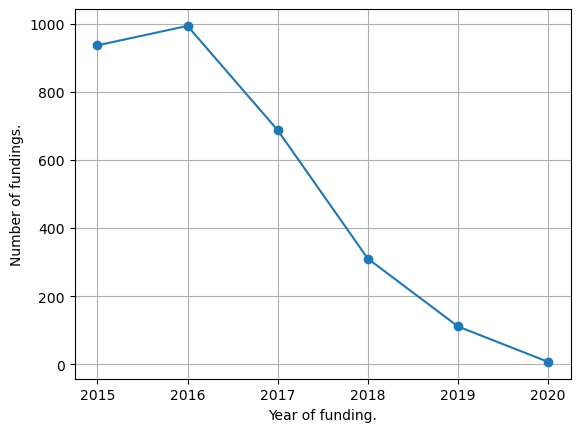

In [9]:
plt.plot(X,Y,marker='o')
plt.grid()
plt.xlabel('Year of funding.')
plt.ylabel('Number of fundings.')
plt.show()

Observations :
Alot companies got funded in the year 2016 and later on the the number of fundings got decreased.
In the year 2019 and 2020 the number of fundings are approximately 100 and 0 respectively probably due to covid-19.

Problem Statement :Find out which cities are generally chosen for starting a startup.
Using count values we can know how many startups were started in each city.
Before that we have to clean some cells.

In [10]:
df.isna().sum() # City location has 180 null values

Sr No                  0
Date dd/mm/yyyy        0
Startup Name           0
Industry Vertical    171
SubVertical          936
City  Location       180
Investors Name        24
InvestmentnType        4
Amount in USD        964
Year                   0
dtype: int64

In [11]:
df = df.dropna(subset=['City  Location']) # Dropping them from data-frame
df = df.replace({'Delhi' : 'New Delhi'}) # Changing Delhi to New Delhi
df = df.replace({'Nw Delhi' : 'New Delhi'})# Changing Nw Delhi to New Delhi
# In some places they have mentioned Bangalore as Bengaluru which refer to same cities.
df = df.replace({'Bengaluru' : 'Bangalore'}) # Changing Bengaluru to  Bangalore
df = df.replace({'Gurgaon' : 'Gurugram'}) # Changing Gurgaon to  Gurugram

In [12]:
# Multi city startups we seperated by '/' we have to consider onli first city.
(df[(df['City  Location'].str.contains('/'))])

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year
88,89,04-06-2019,Leegality,Services,Digital Documentation,Mumbai/Bengaluru,Mumbai Angels,Series A,"34,00,000",2019
113,114,08-02-2019,Zilingo,Ecommerce,Fashion & Apparel,India/Singapore,"Sequoia Capital and Temasek Holdings, EDBI, Bu...",Series D,"22,60,00,000",2019
117,118,04-01-2019,Vyome Therapeutics Inc.,Health and Wellness,Specialty pharmaceutical,India/US,"Iron Pillar, Perceptive Advisors, Romulus Capi...",Series D,"2,20,00,000",2019
140,141,23-11-2018,Signzy,Financial Tech,Digital Onboarding Solution,Mumbai/Bengaluru,Stellaris Venture Partners and Kalaari Capital...,Series A,"34,00,000",2018
141,142,24-11-2018,Engineer.ai,Software,AI Platform,India/US,"Lakestar and Jungle Ventures, Softbank\\xe2\\x...",Series A,"2,95,00,000",2018
1350,1351,07-09-2016,Zilingo,eCommerce,Online Fashion Retailer,Bangalore/ Bangkok,"Venturra Capital, Sequoia India, Susquehanna I...",Private Equity,"80,00,000",2016
1740,1741,01-04-2016,Dil Mil,Consumer Internet,Matchmaking Mobile App,SFO / Bangalore,"Nelstone Ventures, Transmedia Capital, Maiden ...",Private Equity,"27,00,000",2016
1824,1825,02-03-2016,Skedool,Consumer Internet,AI based Office Assistant Mobile App,Seattle / Bangalore,"Kludein LLC\\nPhanindra Sama, Narayan Ramachan...",Seed Funding,NaN,2016
1858,1859,10-03-2016,Icertis,Technology,Contract Management Software Solutions platform,Pune/Seattle,"Ignition Partners, Greycroft Partners, Fidelit...",Private Equity,"1,50,00,000",2016
1911,1912,03-02-2016,Mazkara,Consumer Internet,Beauty & Wellness Platform,Pune / Dubai,Dunamis Ventures Pte Ltd.,Seed Funding,"10,00,000",2016


In [13]:
# Creating a new column called Final-city
df["Final-city"]= df["City  Location"].str.split("/", n = 1, expand = False)
df['Final-city']  = df['Final-city'].str[0]
df['Final-city'] = df['Final-city'].str.capitalize() # Fetching the first city and capitalising it.

In [14]:
D = df['Final-city'].value_counts().iloc[:10]
D # Fetching top-10 cities.

Bangalore    844
Mumbai       570
New delhi    460
Gurugram     341
Pune         106
Hyderabad    100
Chennai       98
Noida         93
Ahmedabad     38
Jaipur        30
Name: Final-city, dtype: int64

In [15]:
labels = list(D.index)
labels

['Bangalore',
 'Mumbai',
 'New delhi',
 'Gurugram',
 'Pune',
 'Hyderabad',
 'Chennai',
 'Noida',
 'Ahmedabad',
 'Jaipur']

In [16]:
val = list(D.values)
val

[844, 570, 460, 341, 106, 100, 98, 93, 38, 30]

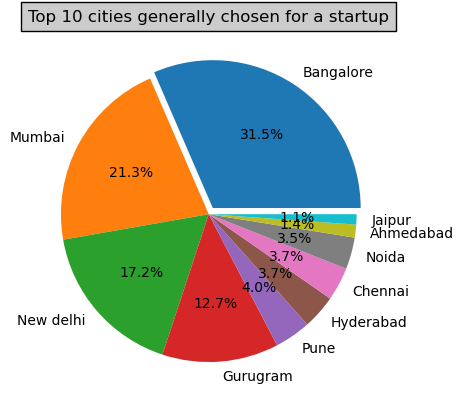

In [17]:
# Creating a pie-plot
ex = [0.05,0,0,0,0,0,0,0,0,0]
plt.pie(val,labels = labels,startangle=0,explode = ex,autopct='%1.1f%%')
plt.title("Top 10 cities generally chosen for a startup", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

Observations :
Bangalore is top-1 city among the top-10 cities which are generally chosen for starting a startup.
Among the top 10 cities Bangalore has a share of nearly 32%.

Problem Statement :Find out if cities play any role in receiving funding.

In [18]:
df2 = df.copy() # Just copying the dataframe

In [19]:
# We have commas in the Amount in USD column we have to remove columns and convert that into numeric
df2['Amount in USD'] = df2['Amount in USD'].str.replace(',','')
df2 = df2.dropna(subset=['Final-city','Amount in USD']) # Removing the null values in both the columns.

In [20]:
# Some cells in the column 'Amount in USD' has 'undisclosed' , 'Undisclosed' , 'unknown'
# We will replace them with 0 If we drop the rows the count of startups will get decreased.
df2['Amount in USD'] = df2['Amount in USD'].str.replace('unknown','0')
df2['Amount in USD'] = df2['Amount in USD'].str.replace('undisclosed','0')
df2['Amount in USD'] = df2['Amount in USD'].str.replace('Undisclosed','0')

In [21]:
df2.loc[109,'Amount in USD'] # We have to remove +

'14342000+'

In [22]:
df2.loc[109,'Amount in USD'] = '14342000'

In [23]:
df2.loc[109,'Amount in USD']

'14342000'

In [24]:
# Converting 'Amount in USD' to numeric.
df2['Amount in USD'] = pd.to_numeric(df2['Amount in USD'])

In [25]:
# Grouping by based on city
X = df2.groupby(['Final-city'])

In [26]:
ans = pd.DataFrame(X.sum())
ans.head()

,Sr No,Amount in USD
Final-city,,
Ahemadabad,555,6.344811e+06
Ahmedabad,43252,1.136360e+08
Amritsar,27,3.000000e+05
Andheri,71,5.750000e+06
Bangalore,766116,1.850061e+10


In [27]:
# Removing Sr No column
del ans['Sr No']

In [28]:
# To display the full numbers
pd.options.display.float_format = '{:.2f}'.format

In [29]:
# Sorting them based on the Amount in USD column descending order.
# Extracting top-10 rows
# Denom is the sum of USD column

ans = ans.sort_values('Amount in USD',ascending=False).iloc[:10]

donom = ans['Amount in USD'].sum()

ans['Percentage composition'] = (ans['Amount in USD']/donom)*100

In [30]:
ans

,Amount in USD,Percentage composition
Final-city,,
Bangalore,18500608863.00,53.71
Mumbai,4947335015.00,14.36
Gurugram,3876913657.54,11.25
New delhi,3302171515.00,9.59
Noida,1282864000.00,3.72
Chennai,718767000.00,2.09
Pune,648082000.00,1.88
Menlo park,450000000.00,1.31
Hyderabad,401676230.00,1.17


Some companies have given their names India as first name,other-cities As mentioned in the question we have taken the first city.

Observations :
Among the top 10 companies nearly 54% of the investments were made in Bangalore.

Problem Statement : Find out percentage of amount funded for each investment type.

In [31]:
df2.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Final-city
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.00,2020,Bangalore
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394.00,2020,Gurugram
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.00,2020,Bangalore
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.00,2020,New delhi
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.00,2020,Mumbai


Classifying the investments based in google.
private_equity =
["Private Equity Round", "Private", "PrivateEquity"]
seed_funding =
["Seed Funding", "Seed/ Angel Funding", "Seed / Angel Funding","Seed/Angel Funding", "Seed Round", "Seed / Angle Funding", "Seed","Seed Funding Round"]
debt_funding =
["Debt Funding", "Debt-Funding", "Structured Debt", "Mezzanine", "Debt","Term Loan", "Debt and Preference capital"]
crowd_funding =
["Maiden Round", "Funding Round"]
other_unknown =
["Series A", "Series B", "Series C", "Series D", "Pre-Series A","Angel / Seed Funding", "Equity", "Venture Round", "pre-Series A","Corporate Round", "Series E", "Series F", "Equity Based Funding", "Series B (Extension)", "Pre Series A", "Series J", "Inhouse Funding", "Bridge Round", "Venture - Series Unknown", "Angel Round", "Angel", "Single Venture","Venture", "Series H", "Series G"]

Maximum each and every type of investment has that investment word in them.

In [32]:
# We are creating a new list called COL.
# The elements of that list will be the either Private-Equity/Seed-Funding/Debt-Funding/Crowd-Funding/Others.
COL = []
for x in list(df2['InvestmentnType'].values) :
    if 'Private' in (str(x)) :
        COL.append('Private-Equity')
    elif 'Seed' in (str(x)) :
        COL.append('Seed-Funding')
    elif ('Debt' in (str(x))) or ('Mezzanine' in (str(x))) or ('Term Loan' in (str(x))) :
        COL.append('Debt-Funding')
    elif 'Round' in (str(x)) :
        COL.append('Crowd-Funding')
    else :
        COL.append('Others')

In [33]:
# Creating a new column and passing values as a list (COL)
df2['Types of Funding'] = COL

In [34]:
# Grouping based on the Type of funding column
ans = df2.groupby('Types of Funding')

In [35]:
# Fetching the sum()
ANS = pd.DataFrame(ans.sum())

In [36]:
ANS

,Sr No,Amount in USD
Types of Funding,,
Crowd-Funding,485,1062899605.00
Debt-Funding,9868,192423174.00
Others,7435,8567371234.22
Private-Equity,1435803,26027573165.00
Seed-Funding,1213220,1021783818.00


In [37]:
# Removing Sr No column and changing the column name
ANS = ANS.rename(columns={'Amount in USD':'Total amount of Funding'})
ANS = ANS.drop(columns=['Sr No'])

In [38]:
ANS

,Total amount of Funding
Types of Funding,
Crowd-Funding,1062899605.00
Debt-Funding,192423174.00
Others,8567371234.22
Private-Equity,26027573165.00
Seed-Funding,1021783818.00


In [39]:
denominator = ANS['Total amount of Funding'].sum()

In [40]:
# Creating a new column
ANS['% of Funding'] = ((ANS['Total amount of Funding'])/denominator)*100

In [41]:
ANS = ANS.sort_values('% of Funding',ascending=False)
ANS

,Total amount of Funding,% of Funding
Types of Funding,,
Private-Equity,26027573165.00,70.59
Others,8567371234.22,23.24
Crowd-Funding,1062899605.00,2.88
Seed-Funding,1021783818.00,2.77
Debt-Funding,192423174.00,0.52


In [42]:
# Reseting the index
ANS = ANS.reset_index()
ANS

,Types of Funding,Total amount of Funding,% of Funding
0,Private-Equity,26027573165.00,70.59
1,Others,8567371234.22,23.24
2,Crowd-Funding,1062899605.00,2.88
3,Seed-Funding,1021783818.00,2.77
4,Debt-Funding,192423174.00,0.52


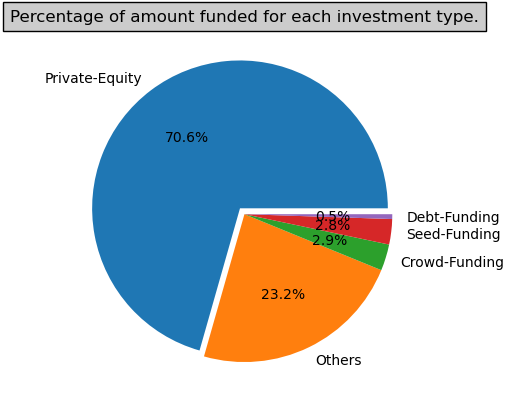

In [43]:
# Creating a pie-plot
ex = [0.05,0,0,0,0]
plt.pie(ANS['Total amount of Funding'],labels = ANS['Types of Funding'],startangle=0,explode = ex,autopct='%1.1f%%')
plt.title("Percentage of amount funded for each investment type.", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

Observations :
If we observe nearly 70% of the funding is from the Private-Equity which means The investors can be family members, angel investors, venture capitalists or private lending institutions.

Problem Statement : Which type of companies got more easily funding.

In [44]:
df2.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Final-city,Types of Funding
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.00,2020,Bangalore,Private-Equity
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394.00,2020,Gurugram,Others
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.00,2020,Bangalore,Others
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.00,2020,New delhi,Others
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.00,2020,Mumbai,Seed-Funding


In [45]:
# In some part in column 'Industry Vertical' we can see
# \\xc3\\xa9\\xe2\\x80\\x99 and \\\\xc3\\\\xa9 ,
# I have replaced them in excel using find and replace.(replaced with e)

In [46]:
# Ecommerce is written as ecommerce , eCommerce
df2['Industry Vertical'] = df2['Industry Vertical'].str.replace('ecommerce','Ecommerce')
df2['Industry Vertical'] = df2['Industry Vertical'].str.replace('eCommerce','Ecommerce')

In [47]:
# Grouping based in Industry types
ans = df2.groupby('Industry Vertical')

In [48]:
ANS = ans.sum().sort_values('Amount in USD',ascending = False)
ANS

,Sr No,Amount in USD
Industry Vertical,,
Consumer Internet,676980,6253031745.00
Ecommerce,165953,5284913000.00
Transportation,262,3916632394.00
Technology,298833,2229707930.00
Finance,25564,1971438000.00
...,...,...
Developer Portfolio Showcase platform,2318,70000.00
Personalized Wish List creator app,2333,50000.00
Coupon Aggregator Platform,2596,20000.00


In [49]:
# Extracting top 5 columns
ANS = ANS.reset_index()[:5]
ANS

,Industry Vertical,Sr No,Amount in USD
0,Consumer Internet,676980,6253031745.00
1,Ecommerce,165953,5284913000.00
2,Transportation,262,3916632394.00
3,Technology,298833,2229707930.00
4,Finance,25564,1971438000.00


In [50]:
# Dropping Sr No column
ANS = ANS.drop(columns=['Sr No'])
ANS

,Industry Vertical,Amount in USD
0,Consumer Internet,6253031745.00
1,Ecommerce,5284913000.00
2,Transportation,3916632394.00
3,Technology,2229707930.00
4,Finance,1971438000.00


In [51]:
total = ANS['Amount in USD'].sum()

In [52]:
ANS['% of investment in domain'] = ((ANS['Amount in USD'])/total)*100

In [53]:
ANS

,Industry Vertical,Amount in USD,% of investment in domain
0,Consumer Internet,6253031745.00,31.81
1,Ecommerce,5284913000.00,26.89
2,Transportation,3916632394.00,19.93
3,Technology,2229707930.00,11.34
4,Finance,1971438000.00,10.03


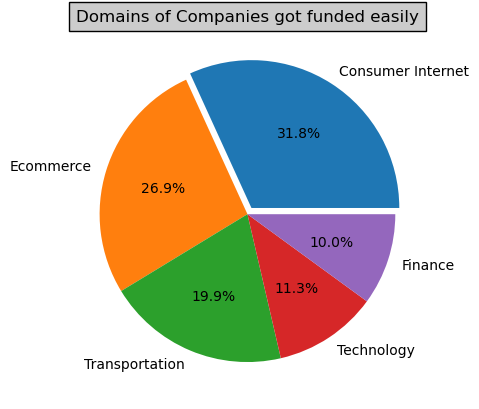

In [54]:
# Creating a pie-plot
ex = [0.05,0,0,0,0]
plt.pie(ANS['Amount in USD'],labels = ANS['Industry Vertical'],startangle=0,explode = ex,autopct='%1.1f%%')
plt.title("Domains of Companies got funded easily", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

Observations :
Among the top 5 investments nearly 32% of the investments we invested in the domain of Consumer Internet.
Companies which belong to domain 'COnsumer Internet' got easily funded.

Problem Statement :Find top 5 startups with most amount of total funding.

Based in some research The top startups which are important are
Ola
Paytm
Oyo
Swiggy
Zomato
Byjus
Flipkart
Razorpay
Udaan
We will focus majorly on these companies.

In [55]:
# We will be acreating a new list called COMP and atlast we will make them into a column

COMP = []
for x in df2['Startup Name'].values :
    if 'ola' in x.lower() :
        COMP.append('Ola') # Some ola,Ola ,Ola-cabs,Ola-electric
    elif 'paytm' in x.lower() :
        COMP.append('Paytm')
    elif 'oyo' in x.lower() :
        COMP.append('Oyo') # Some have oyo/OYO/oyorooms/Oyorooms
    elif 'swiggy' in x.lower() :
        COMP.append('Swiggy')
    elif 'zomato' in x.lower() :
        COMP.append('Zomato')
    elif 'byju' in x.lower() :
        COMP.append("Byju's")
    elif 'flipkart' in x.lower() :
        COMP.append('Flipkart') # Some have flipkrt-logestics
    elif 'razorpay' in x.lower() :
        COMP.append('Razorpay')
    elif 'udaan' in x.lower() :
        COMP.append('Udaan')
    else :
        COMP.append('Others')

In [56]:
df2['Final_company'] = COMP

In [57]:
# Grouping by based on companies
ans = df2.groupby('Final_company').sum()

In [58]:
# Droping the Sr No column and sorting amound calues in descending order
ANS = ans.drop(columns=['Sr No']).sort_values('Amount in USD',ascending=False).reset_index()# Droping column Sr No
ANS

,Final_company,Amount in USD
0,Others,23555044796.22
1,Flipkart,4759700000.00
2,Paytm,3348950000.00
3,Ola,2106856200.00
4,Oyo,972000000.00
5,Udaan,870000000.00
6,Byju's,525000000.00
7,Zomato,435000000.00
8,Swiggy,270500000.00
9,Razorpay,29000000.00


In [59]:
ANS = ANS.drop([0]) # Removing others column and reseting the index
ANS

,Final_company,Amount in USD
1,Flipkart,4759700000.00
2,Paytm,3348950000.00
3,Ola,2106856200.00
4,Oyo,972000000.00
5,Udaan,870000000.00
6,Byju's,525000000.00
7,Zomato,435000000.00
8,Swiggy,270500000.00
9,Razorpay,29000000.00


In [60]:
ANS.index = [0,1,2,3,4,5,6,7,8]
ANS

,Final_company,Amount in USD
0,Flipkart,4759700000.00
1,Paytm,3348950000.00
2,Ola,2106856200.00
3,Oyo,972000000.00
4,Udaan,870000000.00
5,Byju's,525000000.00
6,Zomato,435000000.00
7,Swiggy,270500000.00
8,Razorpay,29000000.00


In [61]:
# We want only top 5
ANS = ANS[:5]
ANS

,Final_company,Amount in USD
0,Flipkart,4759700000.00
1,Paytm,3348950000.00
2,Ola,2106856200.00
3,Oyo,972000000.00
4,Udaan,870000000.00


In [62]:
denimin = (ANS['Amount in USD'].sum())
ANS['%-Company'] = (ANS['Amount in USD'])*(100/denimin)
ANS

,Final_company,Amount in USD,%-Company
0,Flipkart,4759700000.00,39.47
1,Paytm,3348950000.00,27.77
2,Ola,2106856200.00,17.47
3,Oyo,972000000.00,8.06
4,Udaan,870000000.00,7.22


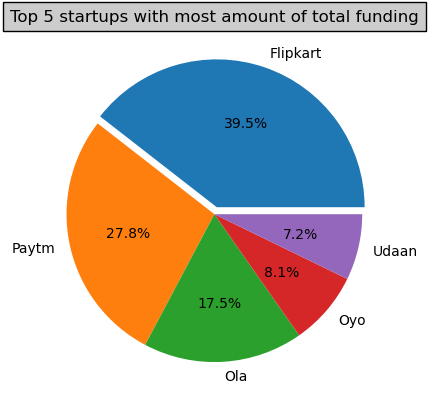

In [63]:
# Creating a pie-plot
ex = [0.05,0,0,0,0]
plt.pie(ANS['Amount in USD'],labels = ANS['Final_company'],startangle=0,explode = ex,autopct='%1.1f%%')
plt.title("Top 5 startups with most amount of total funding", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

Observations :
Among the top 5 important companies Flipkart has a funding of nearly 39.5% value.

Problem Statement : Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

In [64]:
# Here we will take those same important companies.
# we will consider only 'Final-company' column.
df2.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Final-city,Types of Funding,Final_company
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.00,2020,Bangalore,Private-Equity,Byju's
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,8048394.00,2020,Gurugram,Others,Others
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.00,2020,Bangalore,Others,Others
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.00,2020,New delhi,Others,Others
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.00,2020,Mumbai,Seed-Funding,Others


In [65]:
answer = pd.DataFrame(df2['Final_company'].value_counts())

In [66]:
answer = (answer.drop('Others')).reset_index()

In [67]:
answer

,index,Final_company
0,Ola,22
1,Oyo,8
2,Swiggy,8
3,Byju's,6
4,Paytm,6
5,Flipkart,6
6,Zomato,4
7,Udaan,4
8,Razorpay,2


In [68]:
# We need only top 5 so
answer = answer[:5]

In [69]:
# Changing the column names

answer = answer.rename(columns={'index':'Company Name','Final_company':'Number of rounds'})

In [70]:
answer

,Company Name,Number of rounds
0,Ola,22
1,Oyo,8
2,Swiggy,8
3,Byju's,6
4,Paytm,6


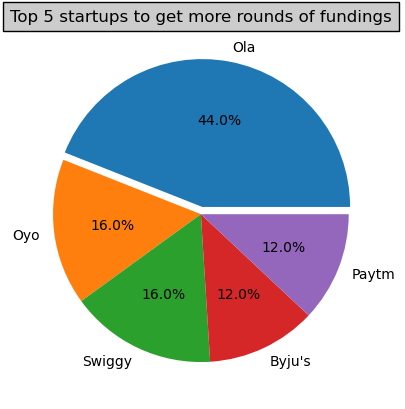

In [71]:
# Creating a pie-plot
ex = [0.05,0,0,0,0]
plt.pie(answer['Number of rounds'],labels = answer['Company Name'],startangle=0,explode = ex,autopct='%1.1f%%')
plt.title("Top 5 startups to get more rounds of fundings", bbox={'facecolor':'0.8', 'pad':5})

plt.show()

Observations :
Among the top 5 important companies Ola has a more number of funding funding rounds.

Answers for insights :

Find out what type of startups are getting funded in the last few years?

The top 5 domains where the huge amount in USD were invested are
Consumer Internet
Ecommerce
Transportation
Technology
Finance
Startups belongs to these 5 domains were funded with huge amount.


Who are the important investors?

In [72]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Year,Final-city
0,1,09-01-2020,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,"20,00,00,000",2020,Bangalore
1,2,13-01-2020,Shuttl,Transportation,App based shuttle service,Gurugram,Susquehanna Growth Equity,Series C,"80,48,394",2020,Gurugram
2,3,09-01-2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860",2020,Bangalore
3,4,02-01-2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",2020,New delhi
4,5,02-01-2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",2020,Mumbai


In [73]:
df['Investors Name'].value_counts().head(20)

Undisclosed Investors     36
Undisclosed investors     30
Indian Angel Network      24
Ratan Tata                23
Kalaari Capital           15
Sequoia Capital           13
Accel Partners            12
Undisclosed Investor      12
Brand Capital             11
undisclosed investors     11
Venture Catalysts         11
RoundGlass Partners       10
Undisclosed                9
Undisclosed investor       9
Info Edge (India) Ltd      9
Nexus Venture Partners     9
Trifecta Capital           8
Unitus Seed Fund           8
Tiger Global               8
Blume Ventures             8
Name: Investors Name, dtype: int64

Excluding first 2 rows (Undisclosed Invistors) the important investors are
Ratan Tata
Kalaari Capital
Sequoia Capital
Accel Partners
Brand Capital
Venture Catalysts
and alot more..........................

What are the hot fields that get a lot of funding these days?

In [74]:
df['SubVertical'].value_counts().head(20)

Online Lending Platform          11
Online Pharmacy                   9
Food Delivery Platform            8
Online Learning Platform          5
Online lending platform           5
Online Lending                    5
Education                         5
Online Education Platform         5
Online Food Delivery              4
Non-Banking Financial Company     4
E-learning                        3
SaaS                              3
Data Analytics platform           3
Online Marketplace                3
Fitness Mobile App                3
ECommerce Marketplace             3
Online Insurance Aggregator       3
Agri-tech                         3
Online Insurance Platform         3
Online Furniture Store            3
Name: SubVertical, dtype: int64

If we observe most of the subdomains to get more fundings are
Online platforms(Money lending , Pharmacy , Food delivery , Education ) are the major.